Let's try my own implementation from Mark Galassi's Math working group book! https://markgalassi.codeberg.page/math-science-working-groups-html/math-for-research/fourier-real-data.html#an-artificial-noisy-signal

Also a great resource I used: https://canlab.github.io/_pages/tutorials/html/high_pass_filtering.html

# Unpacking the fourier transformation:

$$ F(k) = \int f(x) \times e^{-2\pi ikx} dx$$

"What frequencies are hidden in my signal??"

*What does it do?

-takes signal

-Tells me what frequency components are inside it

-how strong each freq is

Break it down!! (https://blog.endaq.com/fourier-transform-basics)

f(x) is the original signal

F(k) is the amplitude of the frequency at component k

k The frequency

The e is the complex wave (which is just sine + cosine) of frequency k

intergral - add up over the whole signal

(One can reconstruct the original signal by flipping F(k) and f(x))

Discrete FT is used in FFT 

FFT gives you frequencies: 

f = 0 (mean)

Low f = long waves (smooth)

high f = short waves -> sharp features.

# The Discrete Fourier Transformation * Do more to understand this.

Plain Explaination:
    'It takes your signal and figures out "how much of each frequency" is inside it.'

Formula works on signals made of N samples (N numbers)

$$ X\left(f\right) = \Sigma \space  x\left(n\right) \times e^{-2\pi i \times f \times \frac{n}{N}}$$

x(n) is the original signal at time-step n.

N = # of total samples

f = which 'frequency bin' I'm analysing. 

n = which sample part i'm working on.

X(f) is how much frequency is present in my signal.

FFT let's us move from the time domain -> the frequency domain.

Given:

$$ x\left(t\right) = sin\left(2\pi f_0t\right) + noise $$

in basic terms:
$ x(t) $ is the value of the signal at time $ t $.

$ 2\pi f_0t $ is the angle fed to the sine function.

$ f_0 $ is frequency of the wave.

$ t $ is time.

so, $ sin\left(2\pi f_0t\right) $ is a function that repeats every $ f_0 $ times every second

$ + noise $ will be implemented later, but it adds noise to the function.

Frequency bin:
    a key part to this is choosing the Frequency sampling rate. It should be at least 2 * the max frequency you want to perserve.
    
    In simple terms, sampling rate means "How often do I measure or record the signal per second?"
    
The frequency sample is described as this: $ f_s = \frac{number\space of\space samples}{time} $

Now, to create a frequency bin:
    Frequency at Bin $ k = \frac{index}{N} \times f_s $

Text(0.5, 0, 'Time')

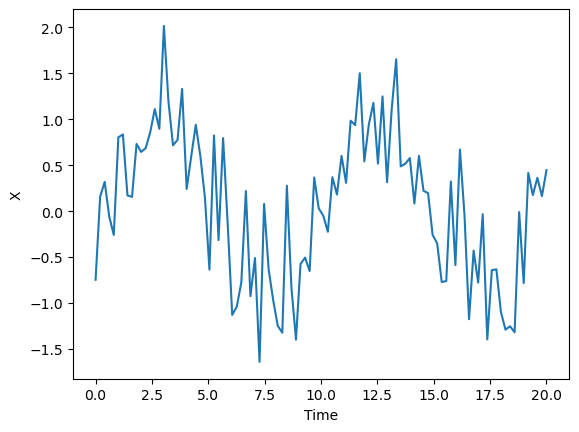

In [66]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0, 20, 100) # 100 points between 0 and 20 seconds
f_0 = 10 # Frequency of the wave
X = np.sin(2 * np.pi * f_0 * time)
#plt.plot(time, X)

noise = 0.5 * np.random.randn(len(X)) # This adds Gaussian Noise! Cool! 
# Basically the + noise makes the mid line (?) of the function increase or decrease, which is how it adds noise.
X = X + noise
plt.plot(time, X)
plt.ylabel('X')
plt.xlabel('Time')

Concept of a filter mask in frequency domain is choosing a cutoff point. Well how do I choose that?

Anyways, after filtering in the frequency domain, use the inverse FFT to construct the filtered signal.


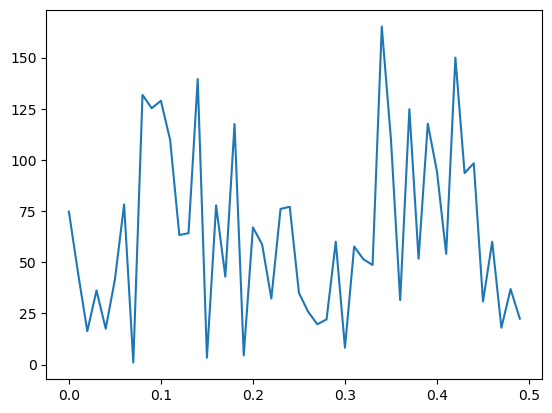

In [77]:
# Now... let's use scipy functions.

from scipy import fftpack

X_transform = fftpack.fft(X)

#What exactly does this mean? does it mean the time step 
# that it moves to plot it on the polar plane?
# I think I need to find a video.
time_step = 1
freqs = fftpack.fftfreq(X.size, d=time_step)


plt.plot(freqs[:N//2], np.abs(X_transform[:N//2]))